In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm,binom
from scipy.stats import poisson
cor = sns.color_palette("pink", 5)


In [ ]:

consumidor = 'desafio_01_consumidor.csv'

df_cons = pd.read_csv(consumidor)

display(df_cons.head())

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:
#Informações DataFrame

total_linhas = df_cons.shape[0]

total_colunas = df_cons.shape[1]

tipos_de_variaveis = df_cons.dtypes

estat_descrit = df_cons.describe()


print(f"Total de linhas do DataFrame:{total_linhas} \n")

print(f"Total de Colunas do DataFrame:{total_colunas} \n")

print(f"Tipos das variáveis do DataFrame:\n{tipos_de_variaveis} \n")

print(f"Estatística Descritiva do DataFrame: \n{estat_descrit}")


Total de linhas do DataFrame:203 

Total de Colunas do DataFrame:6 

Tipos das variáveis do DataFrame:
id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object 

Estatística Descritiva do DataFrame: 
            idade         renda  pre-pandemia
count  203.000000    203.000000    203.000000
mean    42.403941  11586.364532      0.497537
std     14.400715   6288.016708      0.501230
min     15.000000    110.000000      0.000000
25%     31.000000   6705.000000      0.000000
50%     41.000000  11145.000000      0.000000
75%     53.000000  15590.500000      1.000000
max     80.000000  30000.000000      1.000000


In [ ]:
display(df_cons.head())

qtd_regiao = df_cons.groupby(['regiao-BR', 'pre-pandemia']).agg( count=('id_cliente', 'count')).rename(columns={'count':'contagem'}).reset_index()
print(qtd_regiao)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


      regiao-BR  pre-pandemia  contagem
0  Centro-Oeste             0         8
1  Centro-Oeste             1        17
2      Nordeste             0        25
3      Nordeste             1        26
4         Norte             0         9
5         Norte             1         8
6       Sudeste             0        18
7       Sudeste             1        21
8           Sul             0        42
9           Sul             1        29


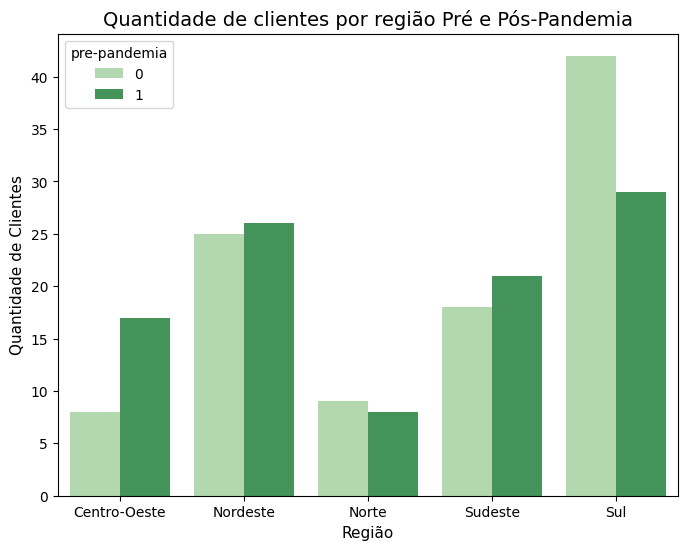

In [ ]:
#Quantidade de clientes por região Pré e Pós-Pandemia

qtd_regiao = df_cons.groupby(['regiao-BR', 'pre-pandemia']).agg( count=('id_cliente', 'count')).rename(columns={'count':'contagem'}).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x="regiao-BR", y="contagem",
            hue="pre-pandemia", data=qtd_regiao,
            palette='Greens')

plt.ylabel("Quantidade de Clientes", size=11)
plt.xlabel("Região", size=11)
plt.title("Quantidade de clientes por região Pré e Pós-Pandemia", size=14)

plt.show()

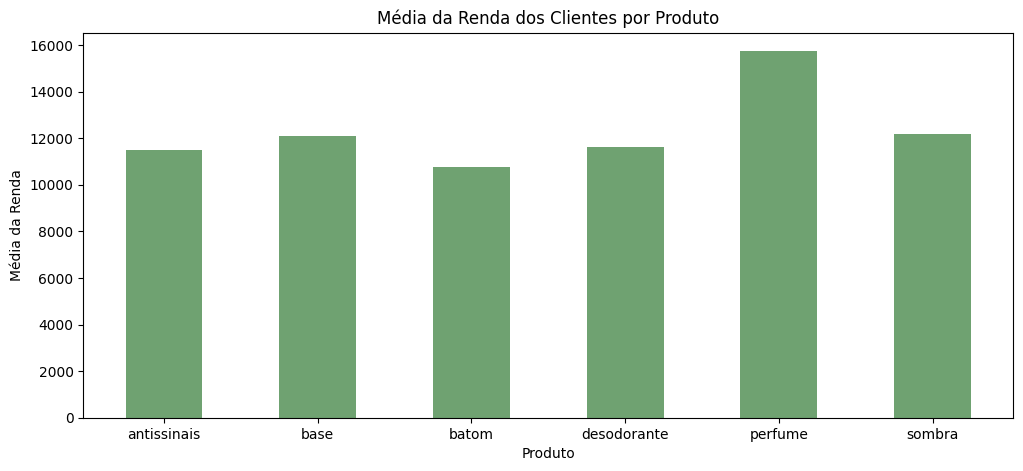

In [ ]:
#Média de Idade dos Clientes por Produtos
produto_renda = df_cons.groupby(['produto']).agg(mean=('renda', 'mean')).sort_index()

index = produto_renda.index
valores = produto_renda['mean']

cor = '#6FA271'

plt.figure(figsize=(12, 5))
plt.bar(index, valores, color=cor, width=0.5)
plt.xlabel('Produto')
plt.ylabel('Média da Renda')
plt.title('Média da Renda dos Clientes por Produto')

plt.show()


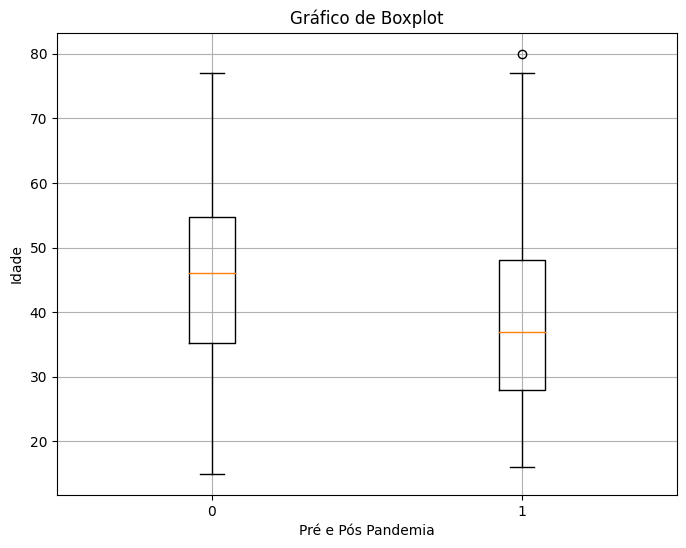

In [ ]:
# Gráfico de Boxplot em relação ao pré e pós-pandemia e a idade dos clientes
plt.figure(figsize=(8, 6))
dados_grupo_0 = df_cons[df_cons['pre-pandemia'] == 0]['idade']
dados_grupo_1 = df_cons[df_cons['pre-pandemia'] == 1]['idade']

plt.boxplot([dados_grupo_0, dados_grupo_1], labels=['0', '1'])

plt.title('Gráfico de Boxplot')
plt.xlabel('Pré e Pós Pandemia')
plt.ylabel('Idade')
plt.grid(True)
plt.show()

        produto     regiao-BR  contagem
0   antissinais  Centro-Oeste         9
1   antissinais      Nordeste         3
2   antissinais         Norte        17
3          base  Centro-Oeste         3
4          base      Nordeste         4
5         batom      Nordeste        11
6         batom       Sudeste        35
7         batom           Sul        30
8   desodorante  Centro-Oeste         5
9   desodorante      Nordeste        16
10  desodorante       Sudeste         4
11  desodorante           Sul        41
12      perfume  Centro-Oeste         4
13      perfume      Nordeste         8
14       sombra  Centro-Oeste         4
15       sombra      Nordeste         9


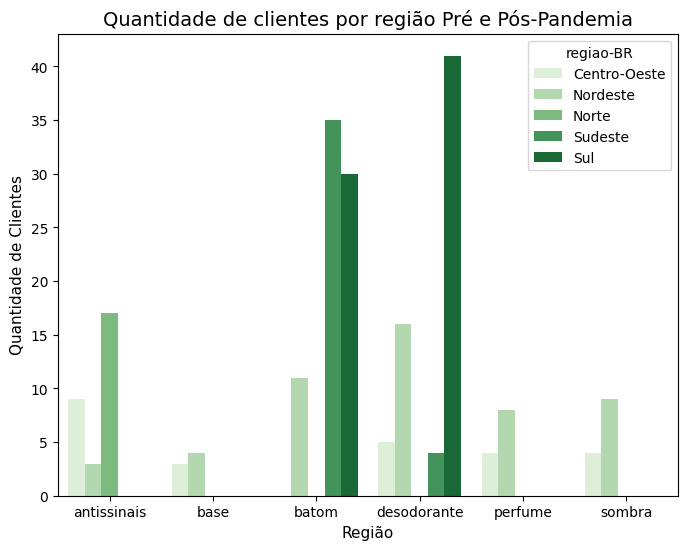

In [ ]:
#Quantidade de vendas por produtos com relação a região -  Pré e Pós-Pandemia

pre_pand= df_cons[(df_cons['pre-pandemia'] == 1)]
qtd_regiao = df_cons.groupby(['produto', 'regiao-BR']).agg( count=('id_cliente', 'count')).rename(columns={'count':'contagem'}).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="produto", y="contagem",
            hue="regiao-BR", data=qtd_regiao,
            palette='Greens')

plt.ylabel("Quantidade de Clientes", size=11)
plt.xlabel("Região", size=11)
plt.title("Quantidade de clientes por região Pré e Pós-Pandemia", size=14)

plt.show()